In [1]:
import os
os.environ["SPS_HOME"] = "/Users/fpetri/packages/fsps" 

In [2]:
import numpy as np

import lbg_forecast.sps as sps
import lbg_forecast.popmodel as pop
import lbg_forecast.sfh as sfh
import lbg_forecast.igm as igm

In [3]:
def simulate_sample_photometry_dpl(nsamples, spectra=False):

    #Define SPS Model
    sps_model = sps.initialise_sps_model(sfh_type=3, dust_type=2)

    i = 0
    photo_data = []
    while(i <  nsamples):

        #Update Model and draw Priors
        sps_params = pop.galaxy_population_model_dpl(1, np.array([3]))
        sps.update_sps_model_dpl(sps_model, sps_params)

        #Generate Photometry
        photo_data.append(sps.simulate_photometry_lsst_fsps(sps_model, mass=sps_params["mass"]))

        #Plot Spectra
        if(spectra):
            spectrum = sps.simulate_sed(sps_model, sps_params)
            
            sps.plot_sed(spectrum, scaley = 16, xmin=2000, xmax=12000, ymin=0,
                ymax=1.4, xsize=20, ysize=10, 
                fontsize=32, log=False, c = 'k')
            
            sps.plot_lsst_filters(factor=1)

        i+=1

    return np.asarray(photo_data)


In [4]:
def simulate_sample_photometry_tau(nsamples, spectra=False):

    #Define SPS Model
    sps_model = sps.initialise_sps_model(sfh_type=1, dust_type=2)

    i = 0
    photo_data = []
    while(i <  nsamples):

        #Update Model and draw Priors
        sps_params = pop.galaxy_population_model(1, np.array([3]))
        sps.update_sps_model(sps_model, sps_params)

        #Generate Photometry
        photo_data.append(sps.simulate_photometry_lsst_fsps(sps_model, mass=sps_params["mass"]))

        #Plot Spectra
        if(spectra):
            spectrum = sps.simulate_sed(sps_model, sps_params)
            
            sps.plot_sed(spectrum, scaley = 16, xmin=2000, xmax=12000, ymin=0,
                ymax=1.4, xsize=20, ysize=10, 
                fontsize=32, log=False, c = 'k')
            
            sps.plot_lsst_filters(factor=1)

        i+=1

    return np.asarray(photo_data)


In [5]:
#simulate_sample_photometry_dpl(1, spectra=True)

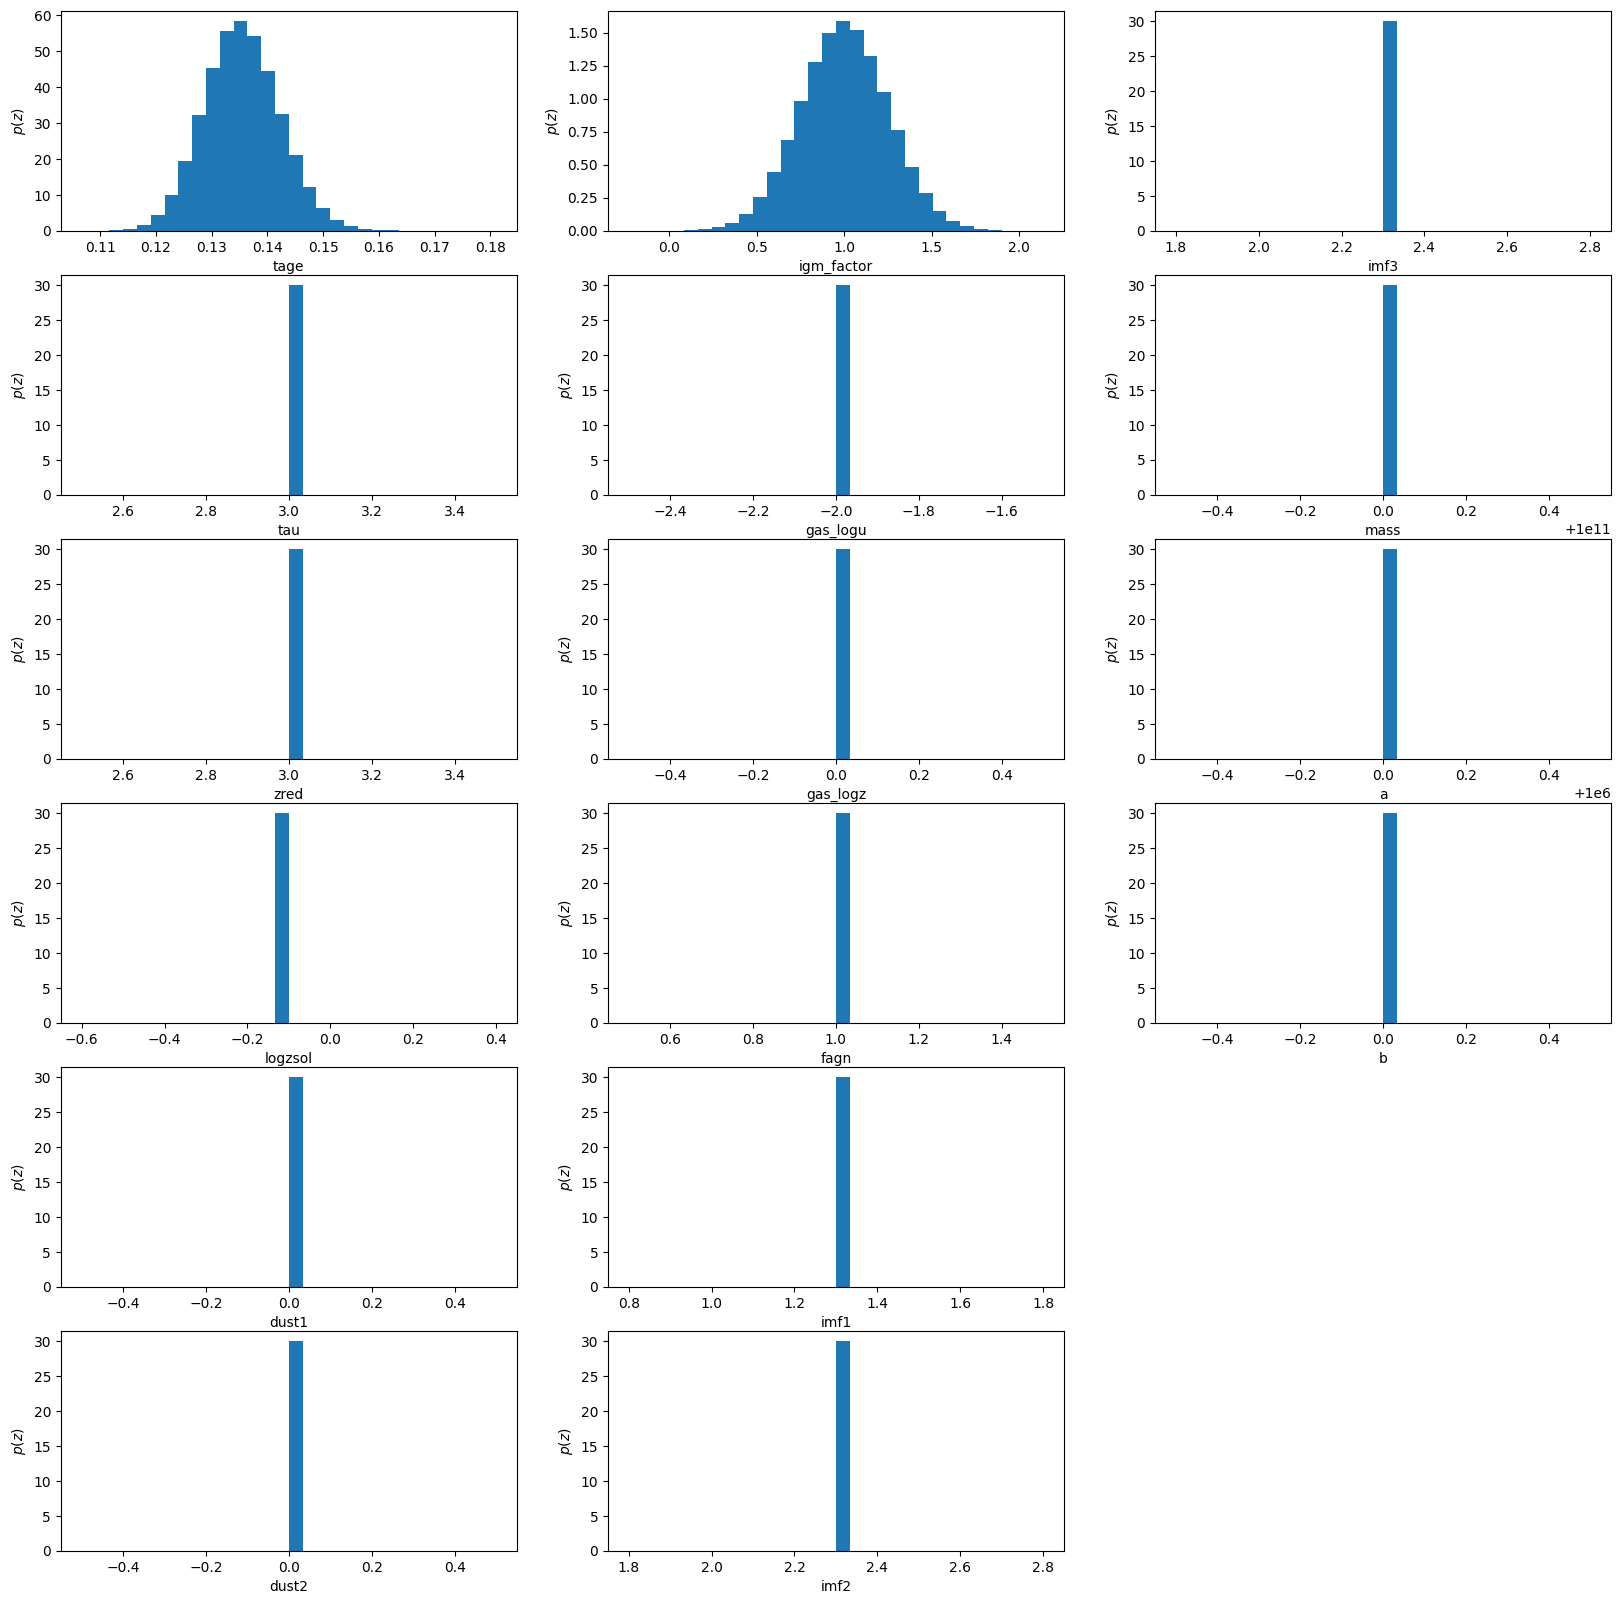

In [6]:
pop.plot_galaxy_population(1000000, rows=6, nbins=30)